In [6]:
#ESCRIBO COSAS RANDOM EN ESTA AREA, PRUEBAS TEST ETC
from platform import python_version

print(python_version())

3.6.15


In [7]:
import pandas as pd
from tqdm import tqdm
import numpy as np

df1 = pd.DataFrame({'lkey': 1000*['a', 'b', 'c', 'd'],'lvalue': np.random.randint(0,int(1e8),4000)})
df2 = pd.DataFrame({'rkey': 1000*['a', 'b', 'c', 'd'],'rvalue': np.random.randint(0, int(1e8),4000)})

#this is how you activate the pandas features in tqdm
tqdm.pandas()
#call the progress_apply feature with a dummy lambda 
df1.merge(df2, left_on='lkey', right_on='rkey').progress_apply(lambda avance: avance)

100%|██████████| 4/4 [00:00<00:00, 42.95it/s]


,lkey,lvalue,rkey,rvalue
0,a,2275284,a,6554087
1,a,2275284,a,56230909
2,a,2275284,a,17023189
3,a,2275284,a,56907802
4,a,2275284,a,10243972
...,...,...,...,...
3999995,d,42583011,d,13760665
3999996,d,42583011,d,18496892
3999997,d,42583011,d,64075744
3999998,d,42583011,d,23283555


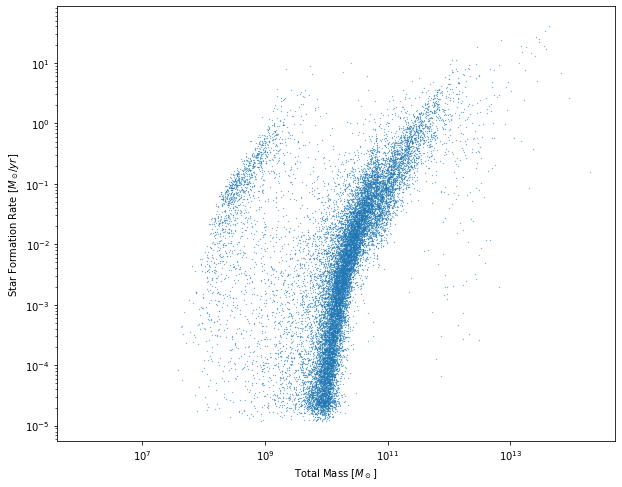

In [2]:
import illustris_python as il
import numpy as np
import matplotlib.pyplot as plt

basePath = '/virgotng/universe/IllustrisTNG/L35n2160TNG/output'
fields = ['SubhaloMass','SubhaloSFRinRad']
subhalos = il.groupcat.loadSubhalos(basePath, 99, fields=fields)
mass_msun = subhalos['SubhaloMass'] * 1e10 / 0.6774
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.plot(mass_msun, subhalos['SubhaloSFRinRad'], '.', markersize=0.5)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Total Mass [$M_\odot$]')
ax.set_ylabel('Star Formation Rate [$M_\odot / yr$]');

In [12]:
fields = ['ParticleIDs']

star = il.snapshot.loadSubset(basePath, 99, 'star', fields=fields)

In [16]:
star

array([146390141809, 148377919050, 147257453292, ..., 153690397674,
       153714199007, 153715459465], dtype=uint64)

In [15]:
len(star) - 1289575331

0

In [1]:
import pandas as pd

# Create two sample DataFrames
data1 = {'Alias': ['John', 'Emily'],
         'Age': [25, 30]}
df1 = pd.DataFrame(data1)

data2 =  {'Name': ['John', 'Emily'],
          'Gender': ['F', 'M']}
df2 = pd.DataFrame(data2)

# Merge the DataFrames based on the 'Name' and 'Alias' columns
result_df = df1.merge(df2, left_on='Alias', right_on='Name')

# Drop the duplicate 'Name' column
result_df = result_df.drop('Name', axis=1)

print(result_df)


   Alias  Age Gender
0   John   25      F
1  Emily   30      M


In [1]:
import numpy as np
from tqdm import tqdm

array1 = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
array2 = np.array([2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26])

# Initialize tqdm with the length of array2
progress_bar = tqdm(total=len(array2), desc="Progress")

# Find elements in array2 that have the same value as in array1
matching_elements = []

for element in array2:

    if element in array1:
        matching_elements.append(element)
    progress_bar.update(1)  # Update the progress bar

progress_bar.close()

print(matching_elements)

Progress: 100%|██████████| 13/13 [00:00<00:00, 12500.22it/s]

[2, 4, 6, 8, 10]


In [11]:
import illustris_python as il

basePath = '/virgotng/universe/IllustrisTNG/L35n2160TNG/output'
fields = ['SubhaloPos','SnapNum']
subhaloid = 547844

test = il.sublink.loadTree(basePath,99,subhaloid,fields=fields,onlyMPB=True)

In [15]:
test['SnapNum'][99-50]

50

In [14]:
snap = 98
snapid = snap - 99
print('x:',test[snapid][0],'y:',test[snapid][1],'z:',test[snapid][2])

x: 7812.0327 y: 15006.693 z: 2209.905


In [8]:
import illustris_python as il

basePath = '/virgotng/universe/IllustrisTNG/L35n2160TNG/output'
fields = ['Coordinates']
subhaloid = 547844
snapshot = 60

star_coordinates_subhalo = il.snapshot.loadSubhalo(basePath, snapshot, subhaloid, 'star', fields=fields)
star_coordinates_subhalo

{'count': 0}

MovieWriter ffmpeg unavailable; using Pillow instead.


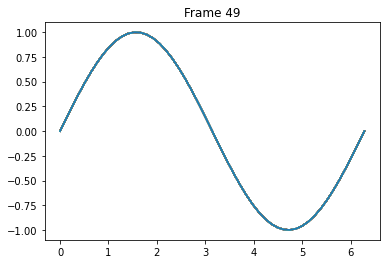

In [25]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np

fig, ax = plt.subplots()

def animate(i):
    x = np.linspace(0, 2*np.pi, 50)
    y = np.sin(x)

    ax.plot(x, y)
    ax.set_title(f'Frame {i}')
    return(None)

anim = FuncAnimation(fig, animate, frames=50, interval=200)

anim.save('animation.gif')

In [3]:
import pandas as pd

subhaloid_list = [ 455291,  478216,  501208,  531910,  547844,  570319, 571633,  582137,  589496,  598112,  606820,  619381,  628949]
subhaloid = subhaloid_list[4]

subhalo_df_v2 = pd.read_csv('tables_v2/subhalo%s.csv'%subhaloid)
subhalo_df_v2.head()

,Unnamed: 0,M,x,y,z,Vx,Vy,Vz,Metallicity,U,StellarFormationTime,R,Jx,Jy,Jz,Total Energy,Circularity,ParticleIDs,LeafSubhaloID
0,0,53560.527344,0.029338,-0.018787,0.050264,-13.022654,39.013739,26.462412,0.946068,-248328.781250,0.280318,0.061157,-2.458153,-1.430931,0.899929,-247132.820952,0.109996,118896913475,7.000001e+16
1,1,49830.773438,-0.002267,0.034888,0.016861,-24.639224,66.195138,5.425658,2.148515,-248640.250000,0.309119,0.038815,-0.926806,-0.403136,0.709570,-246131.087295,0.086729,121068771044,7.000001e+16
2,2,49054.761719,0.156650,-0.127388,-0.002921,-35.227336,29.575495,8.363533,2.436078,-247214.484375,0.340445,0.201930,-0.979014,-1.207235,0.145455,-246121.672491,0.017779,122298304386,7.000001e+16
3,3,65541.531250,0.138966,-0.009450,0.024993,18.796672,49.023140,-20.606975,1.539409,-247484.671875,0.286720,0.141512,-1.030483,3.333459,6.990206,-245894.056589,0.854392,118459758029,7.000001e+16
4,4,56322.742188,-0.079920,0.201489,-0.046180,-23.079251,-40.952395,-19.311553,1.249086,-246930.515625,0.229181,0.221625,-5.782247,-0.477571,7.923111,-245639.172363,0.597183,114774240464,7.000001e+16
